## Capitalmind Coding Test

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
import datetime as datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta
from dateparser import parse
import undetected_chromedriver as uc
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

pd.options.display.precision=4
plt.style.use('seaborn-ticks')
import warnings

warnings.filterwarnings('ignore')

C:\Users\MANAS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MANAS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\MANAS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
today = datetime.today()
year = 2022 #year to be selected from the menu on BSE website. 
month_list = [5,6,7]  #list of months correspond to month numbers on calenders. Only data for those months will be extracted.

In [3]:
#setting the driver
driver = uc.Chrome()
driver.get('https://www.bseindia.com/markets/keystatics/Keystat_index.aspx')

In [4]:
#selecting the type index : S&P BSE 500
ddelement= Select(driver.find_element_by_xpath('//*[@id="ContentPlaceHolder1_ddltype"]'))
ddelement.select_by_visible_text('S&P BSE 500')

In [5]:
"""
On BSE website XPaths of years are as follows :

//*[@id="ContentPlaceHolder1_gvReport_Linkbtn_0"] ---- for 2022-2023 which is link at row 0 
//*[@id="ContentPlaceHolder1_gvReport_Linkbtn_1"] ---- for 2021-2022 which is link at row 1
//*[@id="ContentPlaceHolder1_gvReport_Linkbtn_2"] ---- for 2020-2021 which is link at row 2 and so on...

Therefore, formula for quering out the specific link from the list of years is
linkbutton = current year - year of required data 
eg: if we have selected the year = 2021-->  linkbutton = 1 --> which will query the link at 1st row.
"""
linkbutton = today.year - year
link_year = WebDriverWait(driver, 10).until(lambda x: x.find_element_by_xpath(f'//*[@id="ContentPlaceHolder1_gvReport_Linkbtn_{linkbutton}"]'))
link_year.click()

In [6]:
"""
//*[@id="ContentPlaceHolder1_gvYearwise_lnkmonth_0"] ---- for the most recent month 
- A similar process is followed as quering the linkbutton in the above cell.
- Quering the data for a specific month by iterating over a loop 
"""

df = pd.DataFrame(columns = ["Date","Value"])
for i in month_list:
    linkmonth = today.month - i
    link_month = WebDriverWait(driver, 10).until(lambda x: x.find_element_by_xpath(f'//*[@id="ContentPlaceHolder1_gvYearwise_lnkmonth_{linkmonth}"]'))
    link_month.click()
    time.sleep(10)
    table_trs = driver.find_elements(By.XPATH, '//table[@id=\"ContentPlaceHolder1_grddaily\"]/tbody/tr')
    value_list = []
    for row in table_trs[1:]:
        df = df.append({
            'Date':row.find_elements(By.TAG_NAME, "td")[0].text,
            'Value':row.find_elements(By.TAG_NAME, "td")[5].text
            },ignore_index=True)
  

In [7]:
#converting the alphanumeric dates to datetime format 
for i in range(df.shape[0]):
    df.Date[i] = parse(df.Date[i])
    df.Date[i] = df.Date[i].strftime("%Y-%m-%d")

In [8]:
df.head()

,Date,Value
0,2022-06-01,3.03
1,2022-06-02,3.05
2,2022-06-03,3.03
3,2022-06-06,3.03
4,2022-06-07,3.00


In [9]:
#storing month, day for clear visualization of heatmap.
df['Date']= pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['Value'] = df['Value'].astype(float)

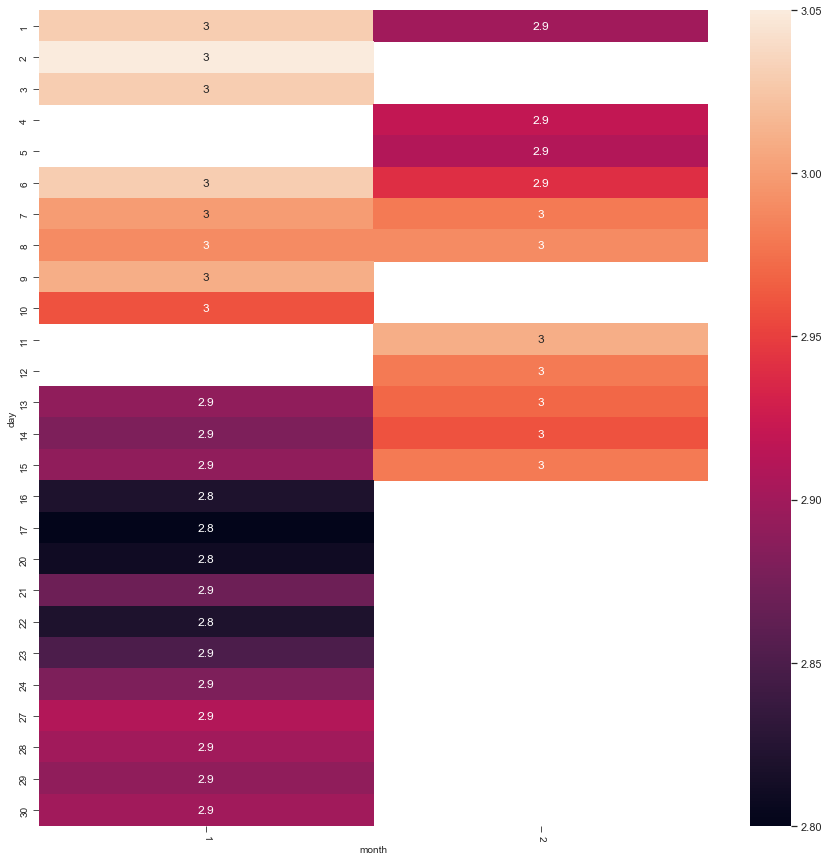

In [10]:
#plotting heatmap
pivot = df.pivot(index='day', columns='month', values='Value')
f, ax = plt.subplots(figsize=(15,15))
sns.set()
ax = sns.heatmap(pivot, annot=True,  ax=ax)
ax.set_xticklabels(df['day']);
plt.xticks(rotation=-90)
plt.savefig(r'C:\Users\MANAS\CapitalMinds\figure.jpg', dpi=600)
plt.show()
plt.close()